# Challenge 7

Base de datos: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

Únicamente se consideró si había o no la presencia de un tumor (glicoma en este caso)

In [6]:
import os
import cv2
import numpy as np

def load_data(data_dir, classes):
    images = []
    labels = []

    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            image = cv2.resize(image, (224, 224))  # Cambiar tamaño de la imagen según sea necesario
            images.append(image)
            labels.append(classes.index(class_name))

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

data_dir = '/content/tumor'  # Directorio principal que contiene las subcarpetas de las clases
classes = ['glicoma', 'no_tumor']  # Nombre de las subcarpetas/clases

images, labels = load_data(data_dir, classes)


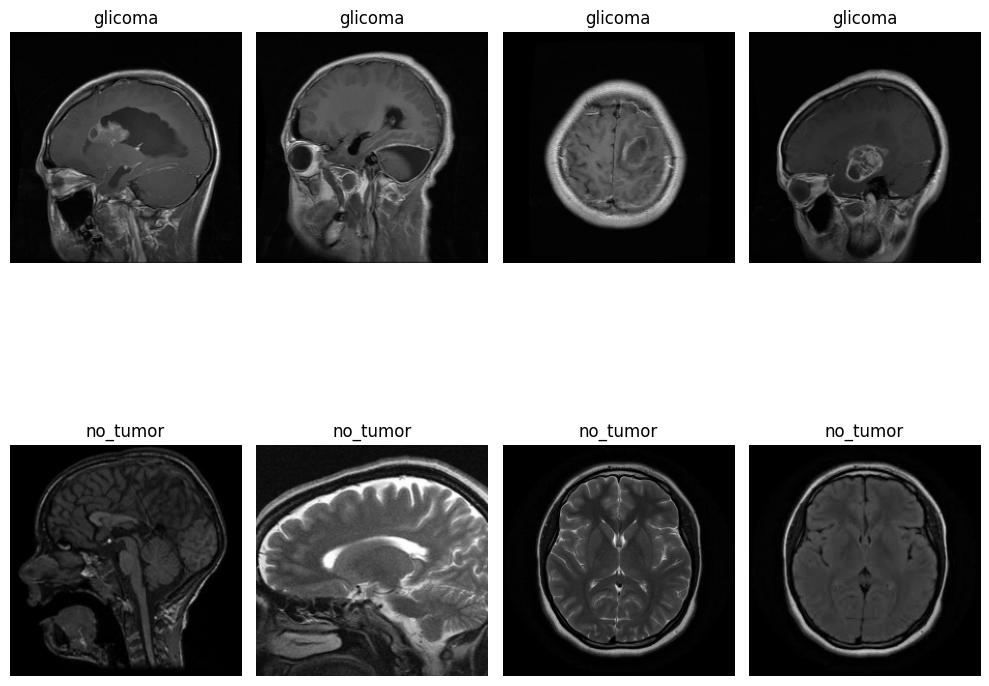

In [8]:
import matplotlib.pyplot as plt

# Función para mostrar imágenes de cada clase
def show_images_per_class(images, labels, classes, num_images=4):
    num_classes = len(classes)

    # Crear subgráficos para cada clase
    fig, axes = plt.subplots(num_classes, num_images, figsize=(10, 10))

    for i, class_name in enumerate(classes):
        class_indices = (labels == i)
        class_images = images[class_indices][:num_images]

        for j in range(num_images):
            axes[i, j].imshow(class_images[j])
            axes[i, j].set_title(class_name)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar algunas imágenes de cada clase
show_images_per_class(images, labels, classes)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir la arquitectura de la red neuronal
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(images, labels, epochs=20, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(images, labels)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/20
4/4 [==============================] - 25s 6s/step - loss: 204.3857 - accuracy: 0.4600 - val_loss: 109.2838 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 15s 4s/step - loss: 22.6132 - accuracy: 0.5800 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 14s 4s/step - loss: 1.1218 - accuracy: 0.4600 - val_loss: 0.4879 - val_accuracy: 0.8077
Epoch 4/20
4/4 [==============================] - 14s 4s/step - loss: 0.4483 - accuracy: 0.8400 - val_loss: 1.1454 - val_accuracy: 0.4231
Epoch 5/20
4/4 [==============================] - 14s 3s/step - loss: 0.2927 - accuracy: 0.9000 - val_loss: 0.7701 - val_accuracy: 0.8846
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 0.1700 - accuracy: 0.9100 - val_loss: 1.9242 - val_accuracy: 0.6923
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.0746 - accuracy: 0.9700 - val_loss: 1.3199 - val_accuracy: 0.8077
Epoch 8/20
4/4 [=========

Epoch 1/20
4/4 [==============================] - 14s 4s/step - loss: 2.6348 - accuracy: 0.8300 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.4275 - accuracy: 0.9500 - val_loss: 7.3503 - val_accuracy: 0.4231
Epoch 3/20
4/4 [==============================] - 14s 3s/step - loss: 1.5670 - accuracy: 0.8300 - val_loss: 0.1228 - val_accuracy: 0.9231
Epoch 4/20
4/4 [==============================] - 17s 4s/step - loss: 0.1157 - accuracy: 0.9700 - val_loss: 0.0980 - val_accuracy: 0.9615
Epoch 5/20
4/4 [==============================] - 14s 3s/step - loss: 0.0464 - accuracy: 0.9900 - val_loss: 0.0865 - val_accuracy: 0.9615
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 0.0246 - accuracy: 0.9900 - val_loss: 0.1361 - val_accuracy: 0.9615
Epoch 7/20
4/4 [==============================] - 14s 4s/step - loss: 0.2600 - accuracy: 0.9500 - val_loss: 0.1013 - val_accuracy: 0.9615
Epoch 8/20
4/4 [==================

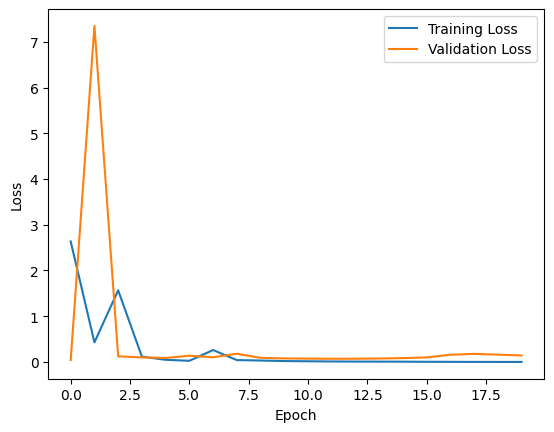

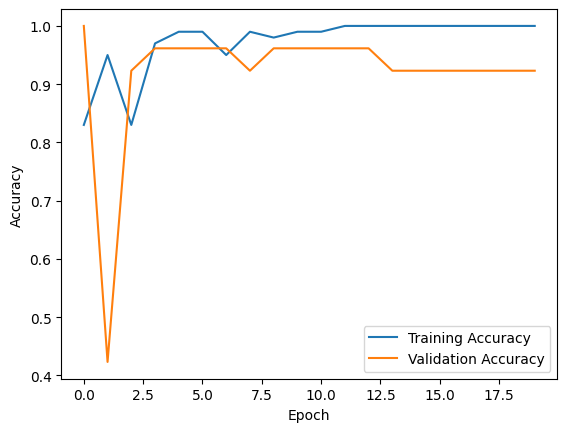

In [9]:
# Dividir los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

# Evaluar el modelo en conjunto de entrenamiento y validación
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
val_loss, val_accuracy = model.evaluate(val_images, val_labels)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Graficar la curva de aprendizaje
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


La curva de precisión de validación sigue de cerca la curva de precisión de entrenamiento, sin divergencia significativa o disminución en el rendimiento en el conjunto de validación en comparación con el conjunto de entrenamiento. En casos de sobreajuste, típicamente observamos que la precisión de entrenamiento continúa aumentando mientras que la precisión de validación se estanca o disminuye después de cierto punto, lo que indica que el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos no vistos. Sin embargo, en este caso, tanto las curvas de precisión de entrenamiento como de validación muestran patrones similares y permanecen razonablemente cercanas a lo largo del rango representado.

Esto sugiere que el modelo está aprendiendo patrones generalizables de los datos de entrenamiento y tiene un rendimiento comparativamente bueno en el conjunto de validación.

En cuanto al error, si bien difiere significativamente al inicio, en las últimas épocas ambas curvas convergen a un valor similar.